# iDENTify Experiment Notebook

### by Claire Luo

## Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Experiment Settings
> These are all the variables that need to be changed to get the notebook to run on anyone's computer.

In [2]:
raw_test_data = "drugsComTest_raw.tsv"
raw_train_data = "drugsComTrain_raw.tsv"
percent_training = 0.8

## Data Collection

This is from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29#

In [3]:
test_data = pd.read_csv(raw_test_data, delimiter='\t')
train_data = pd.read_csv(raw_train_data, delimiter='\t')

In [4]:
train_data.shape

(161297, 7)

In [5]:
test_data.shape

(53766, 7)

In [6]:
test_data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


## Data Exploration
### Are the training and testing data statistically similar?

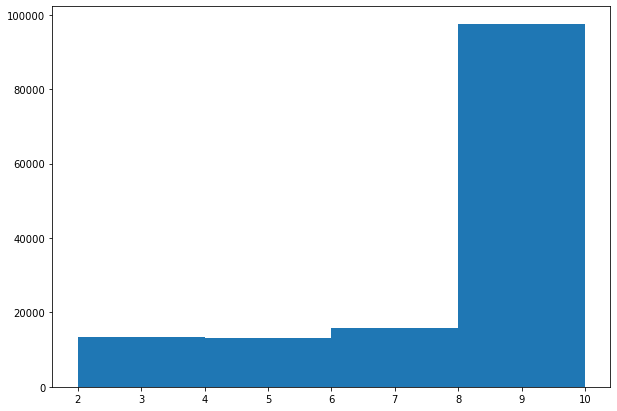

In [7]:
a = np.array(train_data["rating"])
a

fig, ax = plt.subplots(figsize=(10,7))
ax.hist(a, bins=[2,4,6,8,10])
plt.show()

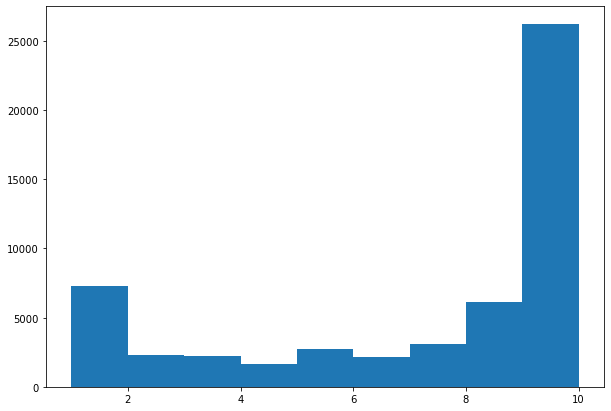

In [8]:
b = np.array(test_data["rating"])
b

fig, ax = plt.subplots(figsize=(10,7))
ax.hist(b, bins=[1,2,3,4,5,6,7,8,9,10])
plt.show()

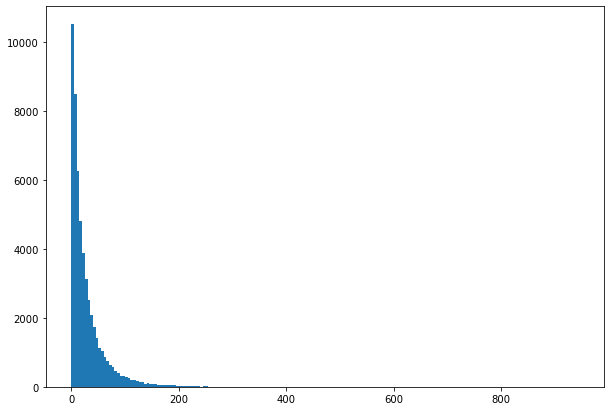

In [9]:
c = np.array(test_data["usefulCount"])
c

fig, ax = plt.subplots(figsize=(10,7))
ax.hist(c, bins=[x for x in range(np.max(c)) if x % 5 == 0])
plt.show()

## Feature Extraction
### Are there any reviews that mention the word 'dentist'

In [10]:
test_drugs = [drug for drug in test_data['drugName']]
train_drugs = [drug for drug in train_data['drugName']]
all_drugs = test_drugs + train_drugs
drug_dict = {}
i = 0
for drug in set(all_drugs):
    drug_dict[drug] = i
    i += 1

In [11]:
columns = 'Person, Drug Name, Rating,  Age, Gender, Ethnicity, dental procedure, Will adverse drug reaction occur, Details'.split(', ')

In [12]:
test_data_reviews = test_data['review']
test_data_reviews

0        "I&#039;ve tried a few antidepressants over th...
1        "My son has Crohn&#039;s disease and has done ...
2                            "Quick reduction of symptoms"
3        "Contrave combines drugs that were used for al...
4        "I have been on this birth control for one cyc...
                               ...                        
53761    "I have taken Tamoxifen for 5 years. Side effe...
53762    "I&#039;ve been taking Lexapro (escitaploprgra...
53763    "I&#039;m married, 34 years old and I have no ...
53764    "I was prescribed Nucynta for severe neck/shou...
53765                                        "It works!!!"
Name: review, Length: 53766, dtype: object

In [13]:
rows = [row for row in train_data["review"] if "bleeding" in row and "gum" in row]
len(rows)

24

In [14]:
def create_identify_data_set(row):
    if 'bleeding' in row['review']:
        occur = 1
    else:
        occur = 0
    return {
        "Drug Name": drug_dict[row['drugName']],
        "Rating": row['rating'],
        "Will adverse drug reaction occur": occur
    }

In [15]:
arr = []
for index, row in train_data.iterrows():
    arr.append(create_identify_data_set(row))

identify_train = pd.DataFrame(arr)
identify_train

,Drug Name,Rating,Will adverse drug reaction occur
0,1985,9.0,0
1,398,8.0,0
2,1004,5.0,0
3,1156,8.0,0
4,1763,9.0,0
...,...,...,...
161292,2269,10.0,0
161293,1000,1.0,0
161294,153,2.0,0
161295,2088,10.0,0


In [16]:
arr = []
for index, row in test_data.iterrows():
    arr.append(create_identify_data_set(row))
identify_test = pd.DataFrame(arr)
identify_test

,Drug Name,Rating,Will adverse drug reaction occur
0,3025,10.0,0
1,1178,8.0,0
2,2405,9.0,0
3,2888,9.0,0
4,1280,9.0,0
...,...,...,...
53761,1083,10.0,0
53762,1145,9.0,0
53763,1558,8.0,0
53764,1641,1.0,0


In [17]:
test_drugs = [drug for drug in test_data['drugName']]
train_drugs = [drug for drug in train_data['drugName']]
all_drugs = test_drugs + train_drugs
len(all_drugs)

drug_dict = {}
i = 0
for drug in set(all_drugs):
    drug_dict[drug] = i
    i+=1
drug_dict

{'Acetaminophen / aspirin / caffeine / salicylamide': 0,
 'Spiriva': 1,
 'Errin': 2,
 'Stadol': 3,
 'Phenylephrine / pyrilamine': 4,
 'Acetaminophen / aspirin': 5,
 'Restasis': 6,
 'Naphazoline / pheniramine': 7,
 'E.E.S.-400': 8,
 'Linagliptin': 9,
 'Pegaptanib': 10,
 'Miglitol': 11,
 'Amitriptyline / perphenazine': 12,
 'Prolensa': 13,
 'Multivitamin': 14,
 'Stelazine': 15,
 'Pramipexole': 16,
 'Dalfampridine': 17,
 'Taytulla': 18,
 'Cardura': 19,
 'Carmol 20': 20,
 'Doribax': 21,
 'AbobotulinumtoxinA': 22,
 'Anaprox': 23,
 'Reglan': 24,
 'Cabergoline': 25,
 'Melpaque HP': 26,
 'Fentanyl': 27,
 'Fortical': 28,
 'Nubain': 29,
 'Bioflavonoids / zinc glycinate': 30,
 'Econazole': 31,
 'Metozolv ODT': 32,
 'Drixoral Cold and Allergy': 33,
 'Depo-Testosterone': 34,
 'Yellow fever vaccine': 35,
 'Fiorinal with Codeine': 36,
 'Keppra XR': 37,
 'Symax Duotab': 38,
 'Chlorpheniramine / dextromethorphan / phenylephrine': 39,
 'Visine Original': 40,
 'Megestrol': 41,
 'Betamethasone / calcipotr

In [18]:
drugName = test_data['drugName']
containsDentist = []
r = 0
for i in test_data_reviews:
    if "dentist" in i:
        containsDentist.append([drugName[r], i])
    r += 1
len(containsDentist)

73

In [19]:
containsDentist

[['Brisdelle',
  '"I have been taking Brisdelle for the past 6 months to help with hot flashes. However, I have had these chronic problems since taking this medication. I have tremors, eyes are sensitive to light, seizures, biting my tongue during the night while sleeping so severe that I have to get up because the blood is so profuse. I also am dizzy all the time, and feel like I am whirling around and unstable while sitting, lying down, or walking about. It has taken me almost 2 months and thousands of dollars to figure this out on my own. I have been to the endocrinologist to see if I have a tumor, neurologist due to the seizures, dentist, ENTSpecialist,  Chiropractor, a Neuro-Opthamologist, and my primary care physician and no one has been able to help me"'],
 ['Xanax',
  '"The first time I took Xanax was when I was having dental work and it was prescribed for the acute anxiety I feel with dentists. This past year my regular doctor suggested I might like to take it from time to tim

### Resampling the dataset (randomly choosing the questions and answers for the AI to train on)

In [20]:
identify_all = pd.concat([identify_test, identify_train], axis=0)
identify_all

,Drug Name,Rating,Will adverse drug reaction occur
0,3025,10.0,0
1,1178,8.0,0
2,2405,9.0,0
3,2888,9.0,0
4,1280,9.0,0
...,...,...,...
161292,2269,10.0,0
161293,1000,1.0,0
161294,153,2.0,0
161295,2088,10.0,0


In [21]:
questions = identify_all.loc[:, identify_all.columns != "Will adverse drug reaction occur"]
questions

,Drug Name,Rating
0,3025,10.0
1,1178,8.0
2,2405,9.0
3,2888,9.0
4,1280,9.0
...,...,...
161292,2269,10.0
161293,1000,1.0
161294,153,2.0
161295,2088,10.0


In [22]:
answers = identify_all.loc[:, identify_all.columns == "Will adverse drug reaction occur"]
answers

,Will adverse drug reaction occur
0,0
1,0
2,0
3,0
4,0
...,...
161292,0
161293,0
161294,0
161295,0


In [23]:
training_questions,test,training_answers,answer_sheet = train_test_split(questions, answers, train_size=percent_training)
training_questions,test,training_answers,answer_sheet

(        Drug Name  Rating
 61454        1314     9.0
 74814        1733     1.0
 72577        2405     1.0
 97568        1558     9.0
 80257         149     1.0
 ...           ...     ...
 127696        794     7.0
 13756        1558     8.0
 108196       1959    10.0
 107063       3631    10.0
 105645       2843    10.0
 
 [172050 rows x 2 columns],
         Drug Name  Rating
 14105         293     6.0
 50273         412    10.0
 80372        1293    10.0
 36980        2930     8.0
 53123         388    10.0
 ...           ...     ...
 26045        1114    10.0
 823          2705     1.0
 27522        1901    10.0
 52174        2843     8.0
 154997       2255    10.0
 
 [43013 rows x 2 columns],
         Will adverse drug reaction occur
 61454                                  0
 74814                                  0
 72577                                  0
 97568                                  0
 80257                                  0
 ...                                  ...

### Teach the AI

In [24]:
classifier = RandomForestClassifier()
model = classifier.fit(training_questions, training_answers.values.ravel())
model

RandomForestClassifier()

In [25]:
test_results = model.predict(test)
test_results

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
answer_sheet

,Will adverse drug reaction occur
14105,0
50273,0
80372,0
36980,0
53123,0
...,...
26045,0
823,0
27522,0
52174,0


In [27]:
answer_sheet = [a for a in answer_sheet['Will adverse drug reaction occur']]
answer_sheet

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [28]:
accuracy_score(test_results, answer_sheet)

0.9494106432938879

In [29]:
correct = 0
wrong = 0
for i in range(len(test_results)):
    if test_results[i] == answer_sheet[i]:
        correct += 1
    else:
        wrong += 1

{"correct": correct, "wrong": wrong}

{'correct': 40837, 'wrong': 2176}